# To analyze the shared motifs data, we will extract the shared motif instances and perform further analysis on them.
## Step 1: Extract shared motif 

In [2]:
# get the list of motifs in each taxonomic group
import pandas as pd

eukaryotic_file=pd.read_csv('eukaryotes/eukaryotes_TP_full_predictions.csv')  
eukaryotic_motifs=eukaryotic_file.ELMIdentifier.unique()

#print(eukaryotic_motifs)
#print(len(eukaryotic_motifs))

bacterial_file=pd.read_csv('bacteria/bacteria_TP_full_predictions.csv')  
bacterial_motifs=bacterial_file.ELMIdentifier.unique()

#print(bacterial_motifs)
#print(len(bacterial_motifs))

viral_file=pd.read_csv('viruses/viruses_TP_full_predictions.csv')  
viral_motifs=viral_file.ELMIdentifier.unique()

#print(bacterial_motifs)
#print(len(viral_motifs))


#shared motifs between eukaryotes and viruses
shared_eukaryotes_viruses= list(set(eukaryotic_motifs).intersection(viral_motifs))
#print(shared_eukaryotes_viruses)
#print(len(shared_eukaryotes_viruses))


#shared motifs between eukaryotes and bacteria
shared_eukaryotes_bacteria= list(set(eukaryotic_motifs).intersection(bacterial_motifs))
#print(shared_eukaryotes_bacteria)
#print(len(shared_eukaryotes_bacteria))

#shared motifs between bacteria and viruses
shared_bacteria_viruses= list(set(bacterial_motifs).intersection(viral_motifs))
#print(shared_bacteria_viruses)
#print(len(shared_bacteria_viruses))





## Step 2: Filter the instances rows that has the shared motifs, then save the file to a csv file.

In [3]:

#shared motif instances between eukaryotes and viruses (Eukatyotic instances)
filtered_euk_v=eukaryotic_file[eukaryotic_file['ELMIdentifier'].isin(shared_eukaryotes_viruses)] 
print(filtered_euk_v.head())
print(len(filtered_euk_v))
# if you want to save the file uncomment the following line (but it is unnecessary and we will not use it later)    
#filtered_euk_v.to_csv('Eukaryotes_inst_shared_with_viruses.csv', encoding='utf-8', index=False, header= True)

#shared motif instances between eukaryotes and bacteria (Eukatyotic instances)
filtered_euk_b=eukaryotic_file[eukaryotic_file['ELMIdentifier'].isin(shared_eukaryotes_bacteria)]
print(filtered_euk_b.head())
print(len(filtered_euk_b))
#filtered_euk_b.to_csv('Eukaryotes_inst_shared_with_bacteria.csv', encoding='utf-8', index=False, header= True) 

#shared motif instances between eukaryotes and bacteria (bacterial_instances)
filtered_bacteria_euk=bacterial_file[bacterial_file['ELMIdentifier'].isin(shared_eukaryotes_bacteria)] 
print(filtered_bacteria_euk.head())
print(len(filtered_bacteria_euk))    
#filtered_bacteria_euk.to_csv('Bacterial_inst_shared_with_eukaryotes.csv', encoding='utf-8', index=False, header= True)


#shared motif instances between eukaryotes and viruses (Viral instances)
filtered_viral_euk=viral_file[viral_file['ELMIdentifier'].isin(shared_eukaryotes_viruses)] 
print(filtered_viral_euk)
print(len(filtered_viral_euk))    
#filtered_viral_euk.to_csv('Viral_inst_shared_with_eukaryotes.csv', encoding='utf-8', index=False, header= True) 


#shared motif instances between bacteria and viruses (Bacterial instances)
filtered_bacteria_v= bacterial_file[bacterial_file['ELMIdentifier'].isin(shared_bacteria_viruses)] 
print(filtered_bacteria_v.head())
print(len(filtered_bacteria_v)) 

#shared motif instances between bacteria and viruses (Viral instances)
filtered_viral_b= viral_file[viral_file['ELMIdentifier'].isin(shared_bacteria_viruses)] 
print(filtered_viral_b.head())
print(len(filtered_viral_b)) 

     Accession ELMType      ELMIdentifier  ProteinName Primary_Acc  \
53  ELMI002704     CLV     CLV_PCSK_FUR_1   BMP1_HUMAN      P13497   
83  ELMI002431     DEG  DEG_APCC_KENBOX_2   ACM1_YEAST      Q08981   
84  ELMI001016     DEG  DEG_APCC_KENBOX_2  AURKB_HUMAN      Q96GD4   
85  ELMI002601     DEG  DEG_APCC_KENBOX_2  BUB1B_HUMAN      O60566   
86  ELMI002600     DEG  DEG_APCC_KENBOX_2  BUB1B_HUMAN      O60566   

                                           Accessions  Start  End  \
53  P13497 A8K6F5 B2RN46 D3DSR0 Q13292 Q13872 Q148...    117  121   
83                                      Q08981 D6W3A3     97  101   
84   Q96GD4 D3DTR4 O14630 O60446 O95083 Q96DV5 Q9UQ46      3    7   
85  O60566 B2R6U0 B4DL09 B4DLG3 O60501 O60627 O607...     25   29   
86  O60566 B2R6U0 B4DL09 B4DLG3 O60501 O60627 O607...    303  307   

           References                                            Methods  ...  \
53           12637569       cleavage assay; inhibitor; mutation analysis  ...   
83

## Step 3: Merge the instances files to make 2 MIDS and MCCS scores data files for shared_viruses_eukaryotes_motifs and shared_bacteria_eukaryotes_motifs

In [6]:
# Use pandas SQL to create the shared motifs data file

!pip install pandasql 

import pandasql as ps #use pandas SQL to create the merged file

#combine shared virus and eukaryotes motif data (ELM identifier, count of instance, mean MIDS and MCCS, individual MIDS and MCCS per instance
# and individual IUPRED2A and NETSURFP scores per amino acid per instance in one table 
virus_in_euk= ps.sqldf("SELECT ELMIdentifier, COUNT(ELMIdentifier) AS 'Instance_count_in_viruses', AVG(Long_MIDS_per_instance) AS 'Long_mMIDS_v', GROUP_CONCAT(Long_MIDS_per_instance) AS 'Long_MIDS_per_instance_v' , GROUP_CONCAT(Long_IUPRED_Scores) AS 'Long_diso_score_per_aa_v',AVG(Short_MIDS_per_instance) AS 'Short_mMIDS_v', GROUP_CONCAT(Short_MIDS_per_instance) AS 'Short_MIDS_per_instance_v' , GROUP_CONCAT(Short_IUPRED_Scores) AS 'Short_diso_score_per_aa_v', AVG(MCCS_per_instance) AS 'mMCCS_v',  GROUP_CONCAT(MCCS_per_instance) AS 'MCCS_per_instance_v', GROUP_CONCAT(Coil_confidence) AS 'CC_per_aa_instance_v' FROM filtered_viral_euk Group by ELMIdentifier ORDER BY ELMIdentifier")
euk_in_virus=ps.sqldf("SELECT ELMIdentifier, COUNT(ELMIdentifier) AS 'Instance_count_in_eukaryotes', AVG(Long_MIDS_per_instance) AS 'Long_mMIDS_e', GROUP_CONCAT(Long_MIDS_per_instance) AS 'Long_MIDS_per_instance_e' , GROUP_CONCAT(Long_IUPRED_Scores) AS 'Long_diso_score_per_aa_e',  AVG(Short_MIDS_per_instance) AS 'Short_mMIDS_e', GROUP_CONCAT(Short_MIDS_per_instance) AS 'Short_MIDS_per_instance_e' , GROUP_CONCAT(Short_IUPRED_Scores) AS 'Short_diso_score_per_aa_e',AVG(MCCS_per_instance) AS 'mMCCS_e',  GROUP_CONCAT(MCCS_per_instance) AS 'MCCS_per_instance_e', GROUP_CONCAT(Coil_confidence) AS 'CC_per_aa_instance_e' FROM filtered_euk_v Group by ELMIdentifier ORDER BY ELMIdentifier")


bacteria_in_euk=ps.sqldf("SELECT ELMIdentifier, COUNT(ELMIdentifier) AS 'Instance_count_in_bacteria', AVG(Long_MIDS_per_instance) AS 'Long_mMIDS_b', GROUP_CONCAT(Long_MIDS_per_instance) AS 'Long_MIDS_per_instance_b' , GROUP_CONCAT(Long_IUPRED_Scores) AS 'Long_diso_score_per_aa_b',AVG(Short_MIDS_per_instance) AS 'Short_mMIDS_b', GROUP_CONCAT(Short_MIDS_per_instance) AS 'Short_MIDS_per_instance_b' , GROUP_CONCAT(Short_IUPRED_Scores) AS 'Short_diso_score_per_aa_b', AVG(MCCS_per_instance) AS 'mMCCS_b',  GROUP_CONCAT(MCCS_per_instance) AS 'MCCS_per_instance_b', GROUP_CONCAT(Coil_confidence) AS 'CC_per_aa_instance_b' FROM filtered_bacteria_euk Group by ELMIdentifier ORDER BY ELMIdentifier")
euk_in_bacteria=ps.sqldf("SELECT ELMIdentifier, COUNT(ELMIdentifier) AS 'Instance_count_in_eukaryotes', AVG(Long_MIDS_per_instance) AS 'Long_mMIDS_e', GROUP_CONCAT(Long_MIDS_per_instance) AS 'Long_MIDS_per_instance_e' , GROUP_CONCAT(Long_IUPRED_Scores) AS 'Long_diso_score_per_aa_e',AVG(Short_MIDS_per_instance) AS 'Short_mMIDS_e', GROUP_CONCAT(Short_MIDS_per_instance) AS 'Short_MIDS_per_instance_e' , GROUP_CONCAT(Short_IUPRED_Scores) AS 'Short_diso_score_per_aa_e', AVG(MCCS_per_instance) AS 'mMCCS_e',  GROUP_CONCAT(MCCS_per_instance) AS 'MCCS_per_instance_e', GROUP_CONCAT(Coil_confidence) AS 'CC_per_aa_instance_e' FROM filtered_euk_b Group by ELMIdentifier ORDER BY ELMIdentifier")


virus_in_bacteria=ps.sqldf("SELECT ELMIdentifier, COUNT(ELMIdentifier) AS 'Instance_count_in_viruses', AVG(Long_MIDS_per_instance) AS 'Long_mMIDS_v', GROUP_CONCAT(Long_MIDS_per_instance) AS 'Long_MIDS_per_instance_v' , GROUP_CONCAT(Long_IUPRED_Scores) AS 'Long_diso_score_per_aa_v', AVG(Short_MIDS_per_instance) AS 'Short_mMIDS_v', GROUP_CONCAT(Short_MIDS_per_instance) AS 'Short_MIDS_per_instance_v' , GROUP_CONCAT(Short_IUPRED_Scores) AS 'Short_diso_score_per_aa_v', AVG(MCCS_per_instance) AS 'mMCCS_v',  GROUP_CONCAT(MCCS_per_instance) AS 'MCCS_per_instance_v', GROUP_CONCAT(Coil_confidence) AS 'CC_per_aa_instance_v' FROM filtered_viral_b Group by ELMIdentifier ORDER BY ELMIdentifier")
bacteria_in_virus=ps.sqldf("SELECT ELMIdentifier, COUNT(ELMIdentifier) AS 'Instance_count_in_bacteria', AVG(Long_MIDS_per_instance) AS 'Long_mMIDS_b', GROUP_CONCAT(Long_MIDS_per_instance) AS 'Long_MIDS_per_instance_b' , GROUP_CONCAT(Long_IUPRED_Scores) AS 'Long_diso_score_per_aa_b', AVG(Short_MIDS_per_instance) AS 'Short_mMIDS_b', GROUP_CONCAT(Short_MIDS_per_instance) AS 'Short_MIDS_per_instance_b' , GROUP_CONCAT(Short_IUPRED_Scores) AS 'Short_diso_score_per_aa_b', AVG(MCCS_per_instance) AS 'mMCCS_b',  GROUP_CONCAT(MCCS_per_instance) AS 'MCCS_per_instance_b', GROUP_CONCAT(Coil_confidence) AS 'CC_per_aa_instance_B' FROM filtered_bacteria_v Group by ELMIdentifier ORDER BY ELMIdentifier")

#print(virus_in_euk)
# Now merge the file based on the ELM identifier to do further correlation analysis on the mMIDS and mMCCS of the shared motifs
merged_shared_virus_eukaryotes=pd.merge(virus_in_euk, euk_in_virus, on ='ELMIdentifier')
merged_shared_bacteria_eukaryotes=pd.merge(bacteria_in_euk, euk_in_bacteria, on ='ELMIdentifier')
merged_shared_virus_bacteria=pd.merge(virus_in_bacteria, bacteria_in_virus, on ='ELMIdentifier')

### These are the data in Table S3
print(merged_shared_virus_eukaryotes)
print(merged_shared_bacteria_eukaryotes)
print(merged_shared_virus_bacteria)

merged_shared_virus_eukaryotes.to_csv('Eukaryotes_inst_shared_with_virus.csv', encoding='utf-8', index=False, header= True) 
merged_shared_bacteria_eukaryotes.to_csv('Eukaryotes_inst_shared_with_bacteria.csv', encoding='utf-8', index=False, header= True) 
merged_shared_virus_bacteria.to_csv('Viruses_inst_shared_with_bacteria.csv', encoding='utf-8', index=False, header= True) 



              ELMIdentifier  Instance_count_in_viruses   mMIDS_v  \
0            CLV_PCSK_FUR_1                         12  0.358380   
1         DEG_APCC_KENBOX_2                          1  0.685960   
2            DEG_SCF_FBW7_2                          1  0.828571   
3           DEG_SCF_TRCP1_1                          2  0.629492   
4          DOC_CYCLIN_RxL_1                          2  0.622269   
5            DOC_PP1_RVXF_1                          1  0.747786   
6            DOC_PP2A_B56_1                          2  0.763642   
7          DOC_PP2B_PxIxI_1                          2  0.102614   
8           DOC_USP7_UBL2_3                          1  0.848540   
9             DOC_WW_Pin1_4                          2  0.275142   
10       LIG_14-3-3_CanoR_1                          1  0.424767   
11            LIG_CSL_BTD_1                          7  0.633100   
12         LIG_CtBP_PxDLS_1                          1  0.630280   
13        LIG_Dynein_DLC8_1                     

## Step 4: Calculate the spearman correlation between shared motifs in Eukaryotes vs bacteria and viruses (MIDS mean and MCCS mean)

In [16]:
from scipy.stats import spearmanr


# Extract data needed for the correlatio analysis
#shared data between eukaryotes and viruses 
eukaryotes_long_mMIDS=merged_shared_virus_eukaryotes.Long_mMIDS_e
viruses_long_mMIDS=merged_shared_virus_eukaryotes.Long_mMIDS_v

eukaryotes_short_mMIDS=merged_shared_virus_eukaryotes.Short_mMIDS_e
viruses_short_mMIDS=merged_shared_virus_eukaryotes.Short_mMIDS_v

eukaryotes_mMCCS=merged_shared_virus_eukaryotes.mMCCS_e
viruses_mMCCS=merged_shared_virus_eukaryotes.mMCCS_v

# Perform correlation analysis on the shared motifs mMIDS and mMCCS 
coef, p =spearmanr(eukaryotes_long_mMIDS, viruses_long_mMIDS)
print('{},{},{:e}\n'.format('eukaryotes_long_mMIDS Vs viruses_long_mMIDS', coef, p))

coef, p =spearmanr(eukaryotes_short_mMIDS, viruses_short_mMIDS)
print('{},{},{:e}\n'.format('eukaryotes_short_mMIDS Vs viruses_short_mMIDS', coef, p))

coef, p =spearmanr(eukaryotes_mMCCS, viruses_mMCCS)
print('{},{},{:e}\n'.format('eukaryotes_mMCCS Vs viruses_mMCCS', coef, p))



#shared data between eukaryotes and bacteria
eukaryotes_long_mMIDS_1=merged_shared_bacteria_eukaryotes.Long_mMIDS_e
bacteria_long_mMIDS_1=merged_shared_bacteria_eukaryotes.Long_mMIDS_b

eukaryotes_short_mMIDS_1=merged_shared_bacteria_eukaryotes.Short_mMIDS_e
bacteria_short_mMIDS_1=merged_shared_bacteria_eukaryotes.Short_mMIDS_b

eukaryotes_mMCCS_1=merged_shared_bacteria_eukaryotes.mMCCS_e
bacteria_mMCCS_1=merged_shared_bacteria_eukaryotes.mMCCS_b


# Perform correlation analysis on the shared motifs mMIDS and mMCCS 
coef, p =spearmanr(eukaryotes_long_mMIDS_1, bacteria_long_mMIDS_1)
print('{},{},{:e}\n'.format('eukaryotes_long_mMIDS Vs bacteria_long_mMIDS', coef, p))

coef, p =spearmanr(eukaryotes_short_mMIDS_1, bacteria_short_mMIDS_1)
print('{},{},{:e}\n'.format('eukaryotes_short_mMIDS Vs bacteria_short_mMIDS', coef, p))

coef, p =spearmanr(eukaryotes_mMCCS_1, bacteria_mMCCS_1)
print('{},{},{:e}\n'.format('eukaryotes_mMCCS Vs bacteria_mMCCS', coef, p))

eukaryotes_mMIDS Vs viruses_mMIDS,0.43438140806561865,8.227281e-04

eukaryotes_mMCCS Vs viruses_mMCCS,0.5460013670539986,1.345791e-05

eukaryotes_mMIDS Vs bacteria_mMIDS,0.4171122994652407,1.573669e-02

eukaryotes_mMCCS Vs bacteria_mMCCS,0.41811497326203206,1.546226e-02



## Step 5: Plot a scatter plot for the correlated data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 3, figsize= (30, 20), sharey='col') #,  sharex = True
sns.set(font_scale = 5)
fig.tight_layout(pad=3)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig.suptitle('Spearman correlation analysis for mMIDS and mMCCS ins shared SLiMs', fontsize =28, fontweight ='bold', y=1.1)
    

ax1=sns.scatterplot(ax=ax[0,0], x=bacteria_long_mMIDS_1, y=eukaryotes_long_mMIDS_1 , color='black')
ax2=sns.scatterplot(ax=ax[0,1], x=bacteria_short_mMIDS_1, y=eukaryotes_short_mMIDS_1 , color='black')
ax3=sns.scatterplot(ax=ax[0,2], x=bacteria_mMCCS_1, y=eukaryotes_mMCCS_1, color='black') 
ax4=sns.scatterplot(ax=ax[1,0], x=viruses_long_mMIDS, y=eukaryotes_long_mMIDS, color='black')
ax5=sns.scatterplot(ax=ax[1,1], x=viruses_short_mMIDS, y=eukaryotes_short_mMIDS, color='black')
ax6=sns.scatterplot(ax=ax[1,2], x=viruses_mMCCS, y=eukaryotes_mMCCS, color='black')

for ax in ax.ravel():
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
        
ax1.set(xlabel='Bacteria long mMIDS', ylabel='Eukaryotes long mMIDS', title='A')
ax2.set(xlabel='Bacteria short mMIDS', ylabel='Eukaryotes short mMIDS', title='B')
ax3.set(xlabel='Bacteria mMCCS', ylabel='Eukaryotes mMCCS', title='C')
ax4.set(xlabel='Viruses long mMIDS', ylabel='Eukaryotes long mMIDS', title='D')
ax5.set(xlabel='Viruses short mMIDS', ylabel='Eukaryotes short mMIDS', title='E')
ax6.set(xlabel='Viruses mMIDS', ylabel='Eukaryotes mMCCS', title='F')

ax.get_figure().savefig('Spearman_correlation_plot.png', dpi=600, bbox_inches='tight')



In [ ]:
#Move the figure to the Figures directory
!mv Spearman_correlation_plot.png Figures/ 

# Perform analysis on the 2 specific motifs
## 1. MOD_N-GLC_1

Extract the MIDS and IUPRED2A scores for each amino acid per instance from Viruses and Eukaryotes taxonomic groups


In [10]:
import re

def extract_data(df,motif_name, column_to_extract, taxonomic_group):
    if '_per_instance_' and 'MCCS' in column_to_extract :
        df=df[df['ELMIdentifier'] == motif_name][column_to_extract].values.tolist()[0].split(',')
        df=[float(x) for x in df]
        df=pd.DataFrame(df)
        df['Taxonomic_group'] = taxonomic_group
        first_col_name=column_to_extract.split('_')[0]
        df['data_type'] = first_col_name
        df.columns=['data','Taxonomic_group', 'data_type']
    elif '_per_instance_' and 'MIDS' in column_to_extract :
        df=df[df['ELMIdentifier'] == motif_name][column_to_extract].values.tolist()[0].split(',')
        df=[float(x) for x in df]
        df=pd.DataFrame(df)
        df['Taxonomic_group'] = taxonomic_group
        first_col_name=column_to_extract.split('_per_instance_')[0]
        df['data_type'] = first_col_name
        df.columns=['data','Taxonomic_group', 'data_type']
        
    elif '_per_aa_' and 'CC' in column_to_extract:
        df=df[df['ELMIdentifier'] == motif_name][column_to_extract].values.tolist()[0]
        df=re.split(r'\[|\]|,| ', df)
        df=[float(x) for x in df if x != ""]
        df=pd.DataFrame(df)
        df['Taxonomic_group'] = taxonomic_group
        first_col_name=column_to_extract.split('_')[0]+'_score'
        df['data_type'] = first_col_name
        df.columns=['data','Taxonomic_group', 'data_type']
    elif '_per_aa_' and 'diso_score' in column_to_extract:
        df=df[df['ELMIdentifier'] == motif_name][column_to_extract].values.tolist()[0]
        df=re.split(r'\[|\]|,| ', df)
        df=[float(x) for x in df if x != ""]
        df=pd.DataFrame(df)
        df['Taxonomic_group'] = taxonomic_group
        first_col_name=column_to_extract.split('_per_aa')[0]
        df['data_type'] = first_col_name
        df.columns=['data','Taxonomic_group', 'data_type']
    return df
        
#Extract Long Disorder data 
MOD_GLC_virus_long_MIDS = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1','Long_MIDS_per_instance_v', 'viruses' )
MOD_GLC_virus_long_diso = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1', 'Long_diso_score_per_aa_v', 'viruses')
MOD_GLC_euk_long_MIDS = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1', 'Long_MIDS_per_instance_e', 'eukaryotes')
MOD_GLC_euk_long_diso = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1', 'Long_diso_score_per_aa_e', 'eukaryotes')

#Extract Short Disorder data 
MOD_GLC_virus_short_MIDS = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1','Short_MIDS_per_instance_v', 'viruses' )
MOD_GLC_virus_short_diso = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1', 'Short_diso_score_per_aa_v', 'viruses')
MOD_GLC_euk_short_MIDS = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1', 'Short_MIDS_per_instance_e', 'eukaryotes')
MOD_GLC_euk_short_diso = extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1', 'Short_diso_score_per_aa_e', 'eukaryotes')

#Extract Coil confidence data 
MOD_GLC_virus_MCCS= extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1','MCCS_per_instance_v', 'viruses' )
MOD_GLC_virus_CC=  extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1','CC_per_aa_instance_v', 'viruses' )
MOD_GLC_euk_MCCS= extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1','MCCS_per_instance_e', 'eukaryotes' )
MOD_GLC_euk_CC=  extract_data(merged_shared_virus_eukaryotes,'MOD_N-GLC_1','CC_per_aa_instance_e', 'eukaryotes' )

concat_all_MOD_GLC=[MOD_GLC_virus_long_MIDS, MOD_GLC_virus_long_diso, MOD_GLC_euk_long_MIDS, MOD_GLC_euk_long_diso, MOD_GLC_virus_short_MIDS, MOD_GLC_virus_short_diso, MOD_GLC_euk_short_MIDS, MOD_GLC_euk_short_diso, MOD_GLC_virus_MCCS, MOD_GLC_virus_CC, MOD_GLC_euk_MCCS, MOD_GLC_euk_CC]

concat_MOD_GLC=pd.concat(concat_all_MOD_GLC)

print(concat_MOD_GLC)

         data Taxonomic_group data_type
0    0.239650         viruses      MIDS
1    0.505583         viruses      MIDS
2    0.216833         viruses      MIDS
3    0.149233         viruses      MIDS
4    0.134683         viruses      MIDS
..        ...             ...       ...
577  0.888093      eukaryotes  CC_score
578  0.975099      eukaryotes  CC_score
579  0.963092      eukaryotes  CC_score
580  0.312316      eukaryotes  CC_score
581  0.087348      eukaryotes  CC_score

[2184 rows x 3 columns]


In [ ]:
from scipy.stats import mannwhitneyu

#Perform Mann Whitney statistics to test if there is significant difference between viruses and eukaryotes

stat, p_value = mannwhitneyu(MOD_GLC_virus_long_MIDS['data'], MOD_GLC_euk_long_MIDS['data'])
print('MOD_GLC_euk_long_MIDS vs. MOD_GLC_virus_long_MIDS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(MOD_GLC_virus_long_diso['data'], MOD_GLC_euk_long_diso['data'])
print('MOD_GLC_euk_long_diso vs. MOD_GLC_virus_long_diso' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(MOD_GLC_virus_short_MIDS['data'], MOD_GLC_euk_short_MIDS['data'])
print('MOD_GLC_euk_short_MIDS vs. MOD_GLC_virus_short_MIDS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(MOD_GLC_virus_short_diso['data'], MOD_GLC_euk_short_diso['data'])
print('MOD_GLC_euk_short_MIDS vs. MOD_GLC_virus_short_MIDS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(MOD_GLC_virus_MCCS['data'], MOD_GLC_euk_MCCS['data'])
print('MOD_GLC_euk_MCCS vs. MOD_GLC_virus_MCCS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(MOD_GLC_virus_CC['data'], MOD_GLC_euk_CC['data'])
print('MOD_GLC_euk_CC vs. MOD_GLC_virus_CC' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

## Plot MOD_N-GLC_1 data

/home/heidy/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


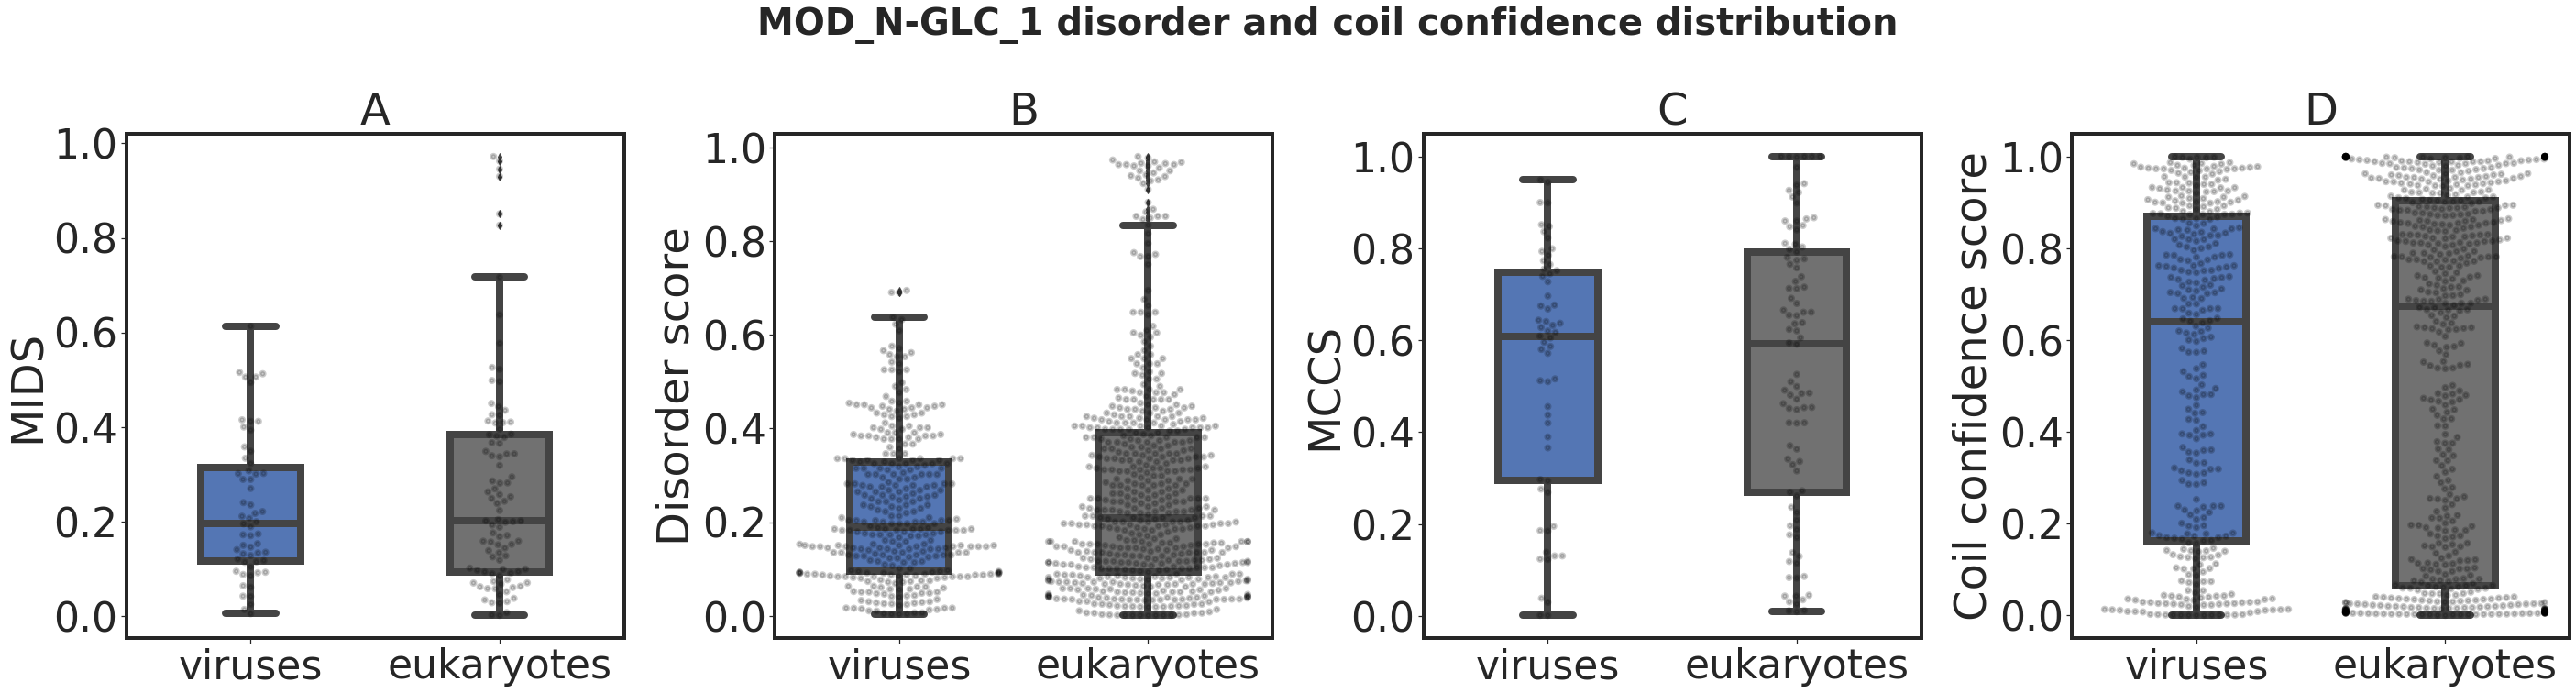

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 3, figsize= (30, 20), sharey='col') #,  
fig.tight_layout(pad=10)
sns.set(font_scale = 3)
sns.set_style('ticks') 

fig.suptitle('MOD_N-GLC_1 disorder and coil confidence distribution', fontsize =40, fontweight ='bold', y=1)

    
taxonomy_palette={'viruses':'#4472C4', 'bacteria':'#548235','eukaryotes':'#717171'}


ax_1=sns.boxplot(ax=axes[0,0],y='data', x='Taxonomic_group', data= concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Long_MIDS'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                 
ax_1=sns.swarmplot(ax=axes[0,0],y='data', x='Taxonomic_group', data=concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Long_MIDS'], linewidth= 3, alpha = 0.2, color='black')
                  
ax_2=sns.boxplot(ax=axes[0,1],y='data', x='Taxonomic_group', data= concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Short_MIDS'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                 
ax_2=sns.swarmplot(ax=axes[0,1],y='data', x='Taxonomic_group', data=concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Short_MIDS'], linewidth= 3, alpha = 0.2, color='black')

ax_3= sns.boxplot(ax=axes[0,2], y='data', x='Taxonomic_group', data= concat_MOD_GLC[concat_MOD_GLC['data_type'] =='MCCS'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                
ax_3= sns.swarmplot(ax=axes[0,2], y='data', x='Taxonomic_group', data=concat_MOD_GLC[concat_MOD_GLC['data_type'] =='MCCS'], linewidth= 3, alpha = 0.2, color='black')
                  
ax_4= sns.boxplot(ax=axes[1,0], y='data', x='Taxonomic_group', data= concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Long_diso_score'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                
ax_4= sns.swarmplot(ax=axes[1,0], y='data', x='Taxonomic_group', data=concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Long_diso_score'], linewidth= 3, alpha = 0.2, color='black')

ax_5= sns.boxplot(ax=axes[1,1], y='data', x='Taxonomic_group', data= concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Short_diso_score'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                
ax_5= sns.swarmplot(ax=axes[1,1], y='data', x='Taxonomic_group', data=concat_MOD_GLC[concat_MOD_GLC['data_type'] =='Short_diso_score'], linewidth= 3, alpha = 0.2, color='black')

ax_6= sns.boxplot(ax=axes[1,2], y='data', x='Taxonomic_group', data= concat_MOD_GLC[concat_MOD_GLC['data_type'] =='CC_score'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )               
ax_6= sns.swarmplot(ax=axes[1,2], y='data', x='Taxonomic_group', data=concat_MOD_GLC[concat_MOD_GLC['data_type'] =='CC_score'], linewidth= 3, alpha = 0.2, color='black')
 

ax_1.set( xlabel= '', ylabel='Long IUPRED2A MIDS', title='A')
ax_2.set( xlabel= '', ylabel='Short IUPRED2A MIDS', title='B')
ax_3.set( xlabel= '',ylabel='MCCS', title='C')
ax_4.set( xlabel= '',ylabel='Long Disorder\n IUPRED2A score', title='D')
ax_5.set( xlabel= '',ylabel='Short Disorder\n IUPRED2A score', title='E')
ax_6.set( xlabel= '',ylabel='Coil confidence score', title='F')


for axes in [ax_1,ax_2, ax_3,ax_4, ax_5,ax_6]:
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['left'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)

fig.savefig('MOD_N_GLC_1_box_swarmplot.png', dpi=600, bbox_inches='tight') 


In [23]:
#Move the figure to the Figures directory
!mv MOD_N_GLC_1_box_swarmplot.png Figures/ #Linux user

## 2. LIG_Rb_LxCxE_1
Extract the MIDS and IUPRED2A scores for each amino acid per instance from Viruses and Eukaryotes taxonomic groups

In [24]:
#Extract Long Disorder data 
LIG_Rb_virus_long_MIDS = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1','Long_MIDS_per_instance_v', 'viruses' )
LIG_Rb_virus_long_diso = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1', 'Long_diso_score_per_aa_v', 'viruses')
LIG_Rb_euk_long_MIDS = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1', 'Long_MIDS_per_instance_e', 'eukaryotes')
LIG_Rb_euk_long_diso = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1', 'Long_diso_score_per_aa_e', 'eukaryotes')

#Extract Short Disorder data 
LIG_Rb_virus_short_MIDS = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1','Short_MIDS_per_instance_v', 'viruses' )
LIG_Rb_virus_short_diso = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1', 'Short_diso_score_per_aa_v', 'viruses')
LIG_Rb_euk_short_MIDS = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1', 'Short_MIDS_per_instance_e', 'eukaryotes')
LIG_Rb_euk_short_diso = extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1', 'Short_diso_score_per_aa_e', 'eukaryotes')

#Extract Coil confidence data 
LIG_Rb_virus_MCCS= extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1','MCCS_per_instance_v', 'viruses' )
LIG_Rb_virus_CC=  extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1','CC_per_aa_instance_v', 'viruses' )
LIG_Rb_euk_MCCS= extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1','MCCS_per_instance_e', 'eukaryotes' )
LIG_Rb_euk_CC=  extract_data(merged_shared_virus_eukaryotes,'LIG_Rb_LxCxE_1','CC_per_aa_instance_e', 'eukaryotes' )

concat_all_LIG_Rb=[LIG_Rb_virus_long_MIDS, LIG_Rb_virus_long_diso, LIG_Rb_euk_long_MIDS, LIG_Rb_euk_long_diso, LIG_Rb_virus_short_MIDS, LIG_Rb_virus_short_diso, LIG_Rb_euk_short_MIDS, LIG_Rb_euk_short_diso, LIG_Rb_virus_MCCS, LIG_Rb_virus_CC, LIG_Rb_euk_MCCS, LIG_Rb_euk_CC]

concat_LIG_Rb=pd.concat(concat_all_LIG_Rb)

print(concat_LIG_Rb)


         data Taxonomic_group data_type
0    0.860611         viruses      MIDS
1    0.286253         viruses      MIDS
2    0.690835         viruses      MIDS
3    0.436563         viruses      MIDS
4    0.509516         viruses      MIDS
..        ...             ...       ...
316  0.944279      eukaryotes  CC_score
317  0.986714      eukaryotes  CC_score
318  0.991166      eukaryotes  CC_score
319  0.986751      eukaryotes  CC_score
320  0.994835      eukaryotes  CC_score

[1242 rows x 3 columns]


In [ ]:
from scipy.stats import mannwhitneyu

#Perform Mann Whitney statistics to test if there is significant difference between viruses and eukaryotes
stat, p_value = mannwhitneyu(LIG_Rb_virus_long_MIDS['data'], LIG_Rb_euk_long_MIDS['data'])
print('LIG_Rb_euk_long_MIDS vs. LIG_Rb_virus_long_MIDS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(LIG_Rb_virus_long_diso['data'], LIG_Rb_euk_long_diso['data'])
print('LIG_Rb_euk_long_diso vs. LIG_Rb_virus_long_diso' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(LIG_Rb_virus_short_MIDS['data'], LIG_Rb_euk_short_MIDS['data'])
print('LIG_Rb_euk_short_MIDS vs. LIG_Rb_virus_short_MIDS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(LIG_Rb_virus_short_diso['data'], LIG_Rb_euk_short_diso['data'])
print('LIG_Rb_euk_short_MIDS vs. LIG_Rb_virus_short_MIDS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(LIG_Rb_virus_MCCS['data'], LIG_Rb_euk_MCCS['data'])
print('LIG_Rb_euk_MCCS vs. LIG_Rb_virus_MCCS' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

stat, p_value = mannwhitneyu(LIG_Rb_virus_CC['data'], LIG_Rb_euk_CC['data'])
print('LIG_Rb_euk_CC vs. LIG_Rb_virus_CC' + ' Statistics=%.2f, p=%.6f' % (stat, p_value))

## Plot LIG_Rb_LxCxE_1 data

/home/heidy/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/heidy/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


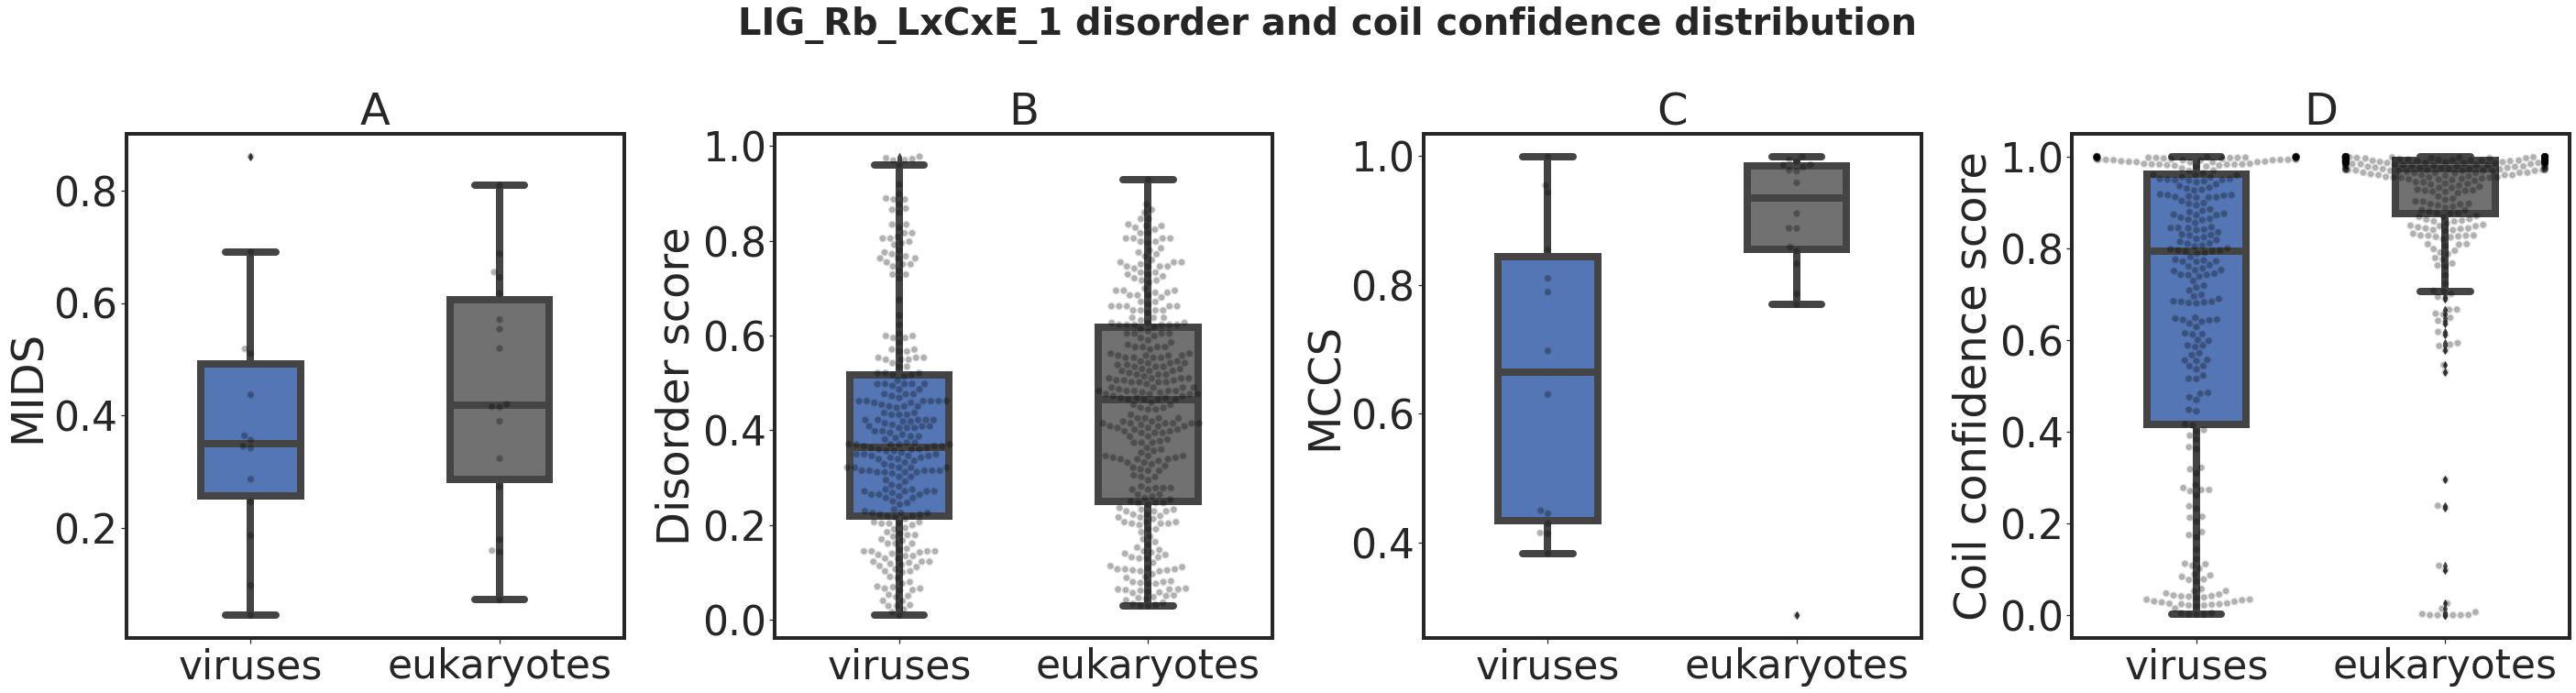

In [25]:
%matplotlib inline

fig, axs = plt.subplots(2, 3, figsize= (30, 20), sharey='col') #,  
fig.tight_layout(pad=10)
sns.set(font_scale = 3)
sns.set_style('ticks') 
#sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 10})
fig.suptitle('LIG_Rb_LxCxE_1 disorder and coil confidence distribution', fontsize =40, fontweight ='bold', y=1)

    
taxonomy_palette={'viruses':'#4472C4', 'bacteria':'#548235','eukaryotes':'#717171'}


ax7=sns.boxplot(ax=axs[0,0],y='data', x='Taxonomic_group', data= concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Long_MIDS'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                 
ax7=sns.swarmplot(ax=axs[0,0],y='data', x='Taxonomic_group', data=concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Long_MIDS'], linewidth= 3, alpha = 0.2, color='black')

ax8=sns.boxplot(ax=axs[0,1],y='data', x='Taxonomic_group', data= concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Short_MIDS'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                 
ax8=sns.swarmplot(ax=axs[0,1],y='data', x='Taxonomic_group', data=concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Short_MIDS'], linewidth= 3, alpha = 0.2, color='black')


ax9= sns.boxplot(ax=axs[0,2], y='data', x='Taxonomic_group', data= concat_LIG_Rb[concat_LIG_Rb['data_type'] =='MCCS'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                
ax9= sns.swarmplot(ax=axs[0,2], y='data', x='Taxonomic_group', data=concat_LIG_Rb[concat_LIG_Rb['data_type'] =='MCCS'], linewidth= 3, alpha = 0.2, color='black')



ax10= sns.boxplot(ax=axs[1,0], y='data', x='Taxonomic_group', data= concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Long_diso_score'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                
ax10= sns.swarmplot(ax=axs[1,0], y='data', x='Taxonomic_group', data=concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Long_diso_score'], linewidth= 3, alpha = 0.2, color='black')


ax11= sns.boxplot(ax=axs[1,1], y='data', x='Taxonomic_group', data= concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Short_diso_score'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )                
ax11= sns.swarmplot(ax=axs[1,1], y='data', x='Taxonomic_group', data=concat_LIG_Rb[concat_LIG_Rb['data_type'] =='Short_diso_score'], linewidth= 3, alpha = 0.2, color='black')
                  

ax12= sns.boxplot(ax=axs[1,2], y='data', x='Taxonomic_group', data= concat_LIG_Rb[concat_LIG_Rb['data_type'] =='CC_score'], palette= taxonomy_palette, width= 0.4 , linewidth= 8 )               
ax12= sns.swarmplot(ax=axs[1,2], y='data', x='Taxonomic_group', data=concat_LIG_Rb[concat_LIG_Rb['data_type'] =='CC_score'], linewidth= 3, alpha = 0.2, color='black')
 
ax7.set( xlabel= '', ylabel='Long IUPRED2A MIDS', title='A')
ax8.set( xlabel= '', ylabel='Short IUPRED2A MIDS', title='B')
ax9.set( xlabel= '',ylabel='MCCS', title='C')
ax10.set( xlabel= '',ylabel='Long Disorder\n IUPRED2A score', title='D')
ax11.set( xlabel= '',ylabel='Short Disorder\n IUPRED2A score', title='E')
ax12.set( xlabel= '',ylabel='Coil confidence score', title='F')


for axs in [ax7,ax8,ax9,ax10,ax11,ax12]:
    axs.spines['bottom'].set_linewidth(4)
    axs.spines['top'].set_linewidth(4)
    axs.spines['left'].set_linewidth(4)
    axs.spines['right'].set_linewidth(4)

fig.savefig('LIG_Rb_LxCxE_1_box_swarmplot.png', dpi=600, bbox_inches='tight') 

In [ ]:
#Move the figure to the Figures directory
!mv LIG_Rb_LxCxE_1_box_swarmplot.png Figures/ 